In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import os
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
class CFG:
    SEED = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Outlier(22)_말감팀 /train.csv')
test = pd.read_csv('/content/drive/MyDrive/Outlier(22)_말감팀 /test.csv')
info = pd.read_csv('/content/drive/MyDrive/Outlier(22)_말감팀 /snp_info.csv')
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [ ]:
info

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


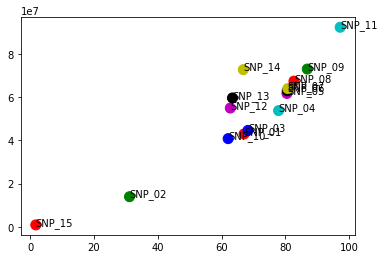

In [ ]:
# 'cm'와 'pos' 간 상관관계

X = info['cm']
y = info['pos']
plt.scatter(X,y,
            marker = 'o',
            s = 100,
            c = ['r','g','b','c','m','k','y','r','g','b','c','m','k','y','r']
            ) 
for X,y,name in zip(X, y, info['SNP_id']):
  plt.text(X,y,name)
plt.show()

In [ ]:
!pip install adjustText
# matplot- 그래프에 값 표시하기 (plt.text 함수 사용)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=34593e2fb87081907146b68e2428c590c1d63a3634334bcdf0b803cfaaafa7c1
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


176

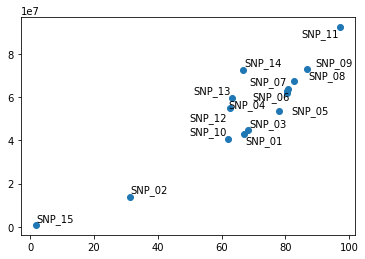

In [ ]:
from adjustText import adjust_text

xs = info['cm']
ys = info['pos']

plt.scatter(xs, ys, marker='o')
texts = [plt.text(x, y, t) for x, y, t in zip(xs, ys, info['SNP_id'])]
adjust_text(texts)

In [ ]:
# null 값이 있는 feature와 결측의 개수 출력하는 함수 

def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

In [ ]:
print(null_check(train))

None


In [ ]:
print(null_check(test))

None


class별 분포

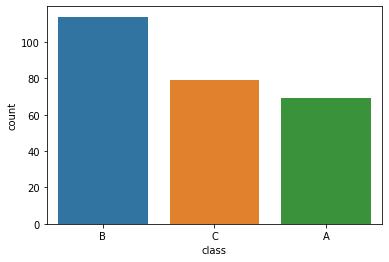

In [ ]:
import seaborn as sns
sns.countplot(data=train, x='class')   

In [ ]:
print(train['class'].value_counts())

B    114
C     79
A     69
Name: class, dtype: int64


전처리 : 범주형 -> 수치형

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [ ]:
from sklearn import preprocessing
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [ ]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [ ]:
train_x

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,0,0,0,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,0,0,0,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,0,0,0,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,0,0,0,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,0,0,0,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,0,0,0,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,0,0,0,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


In [ ]:
train_x = train_x.drop(columns=['father', 'mother', 'gender'])
test_x = test_x.drop(columns=['father', 'mother', 'gender'])

변수 별 상관관계 분석

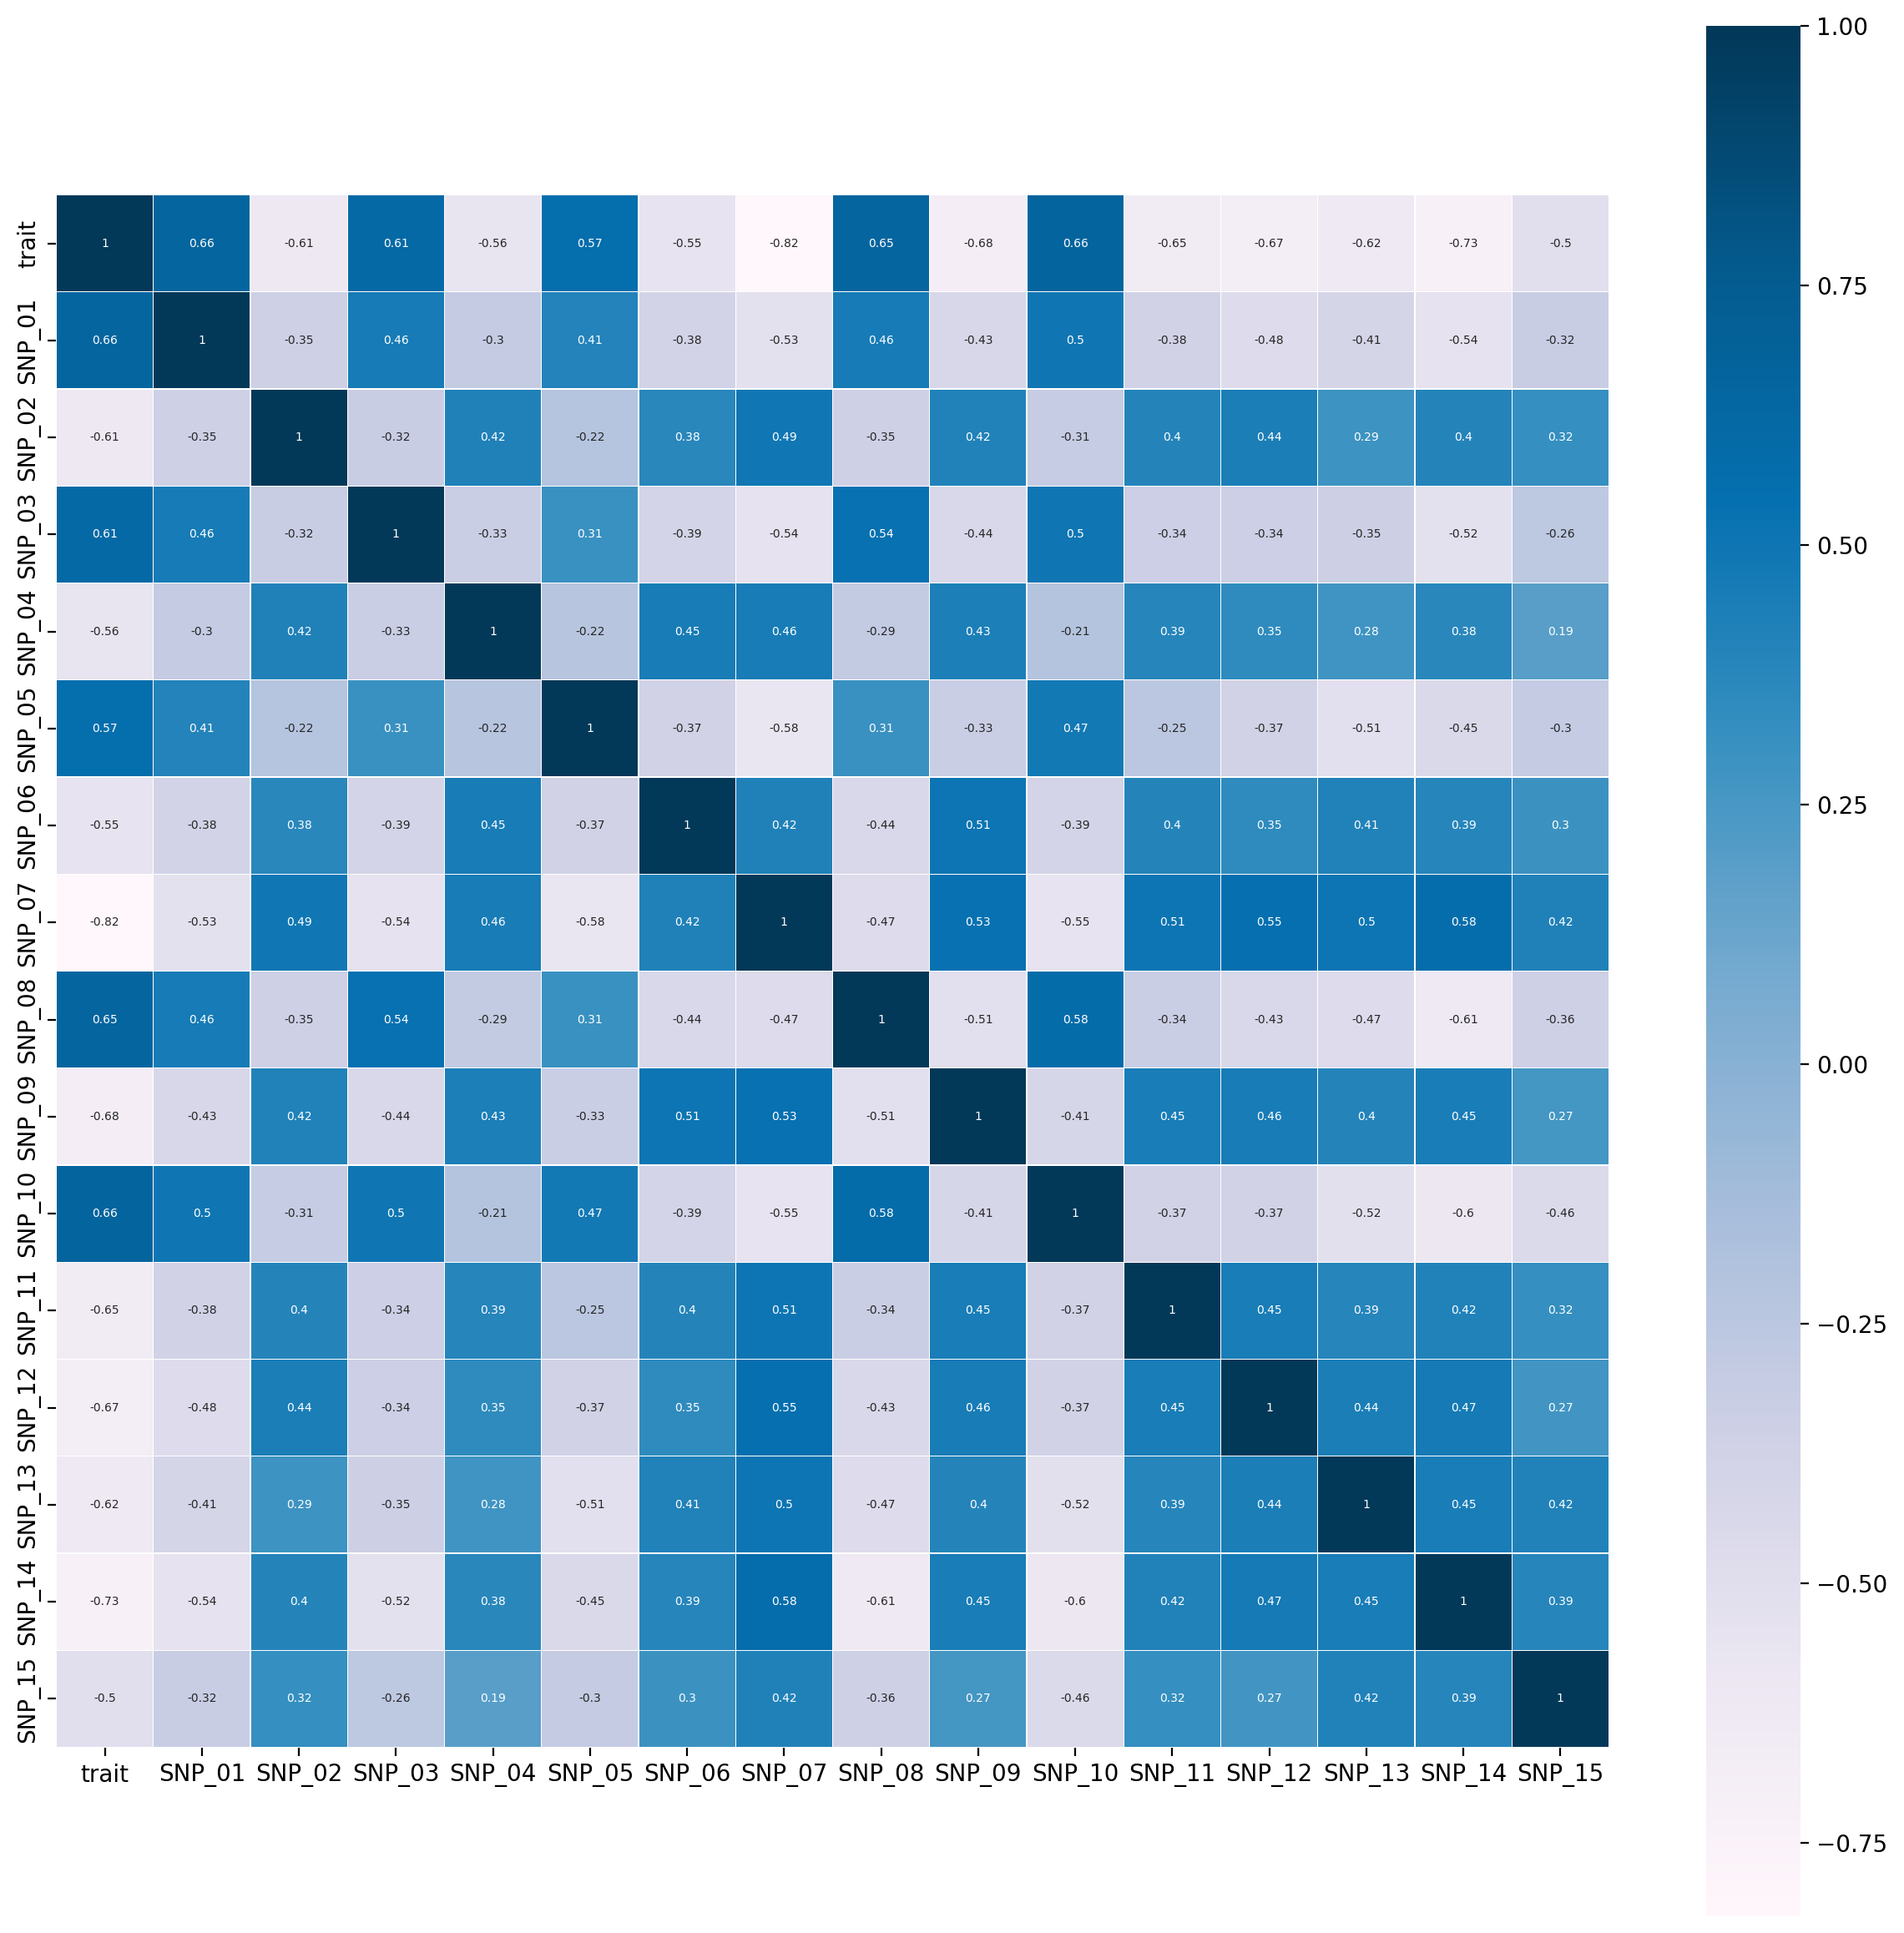

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(15,15), dpi=200)

sns.heatmap(train_x.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 5})

In [ ]:
#@title outlier 탐색


In [ ]:
from sklearn.svm import OneClassSVM

print(train_x.describe())

            trait      SNP_01      SNP_02      SNP_03      SNP_04      SNP_05  \
count  262.000000  262.000000  262.000000  262.000000  262.000000  262.000000   
mean     1.736641    2.961832    2.431298    1.251908    2.354962    1.595420   
std      0.441298    2.229735    2.186920    1.221415    2.197167    1.261141   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
50%      2.000000    5.000000    1.000000    2.000000    4.000000    2.000000   
75%      2.000000    5.000000    5.000000    2.000000    4.000000    3.000000   
max      2.000000    5.000000    5.000000    3.000000    5.000000    3.000000   

           SNP_06      SNP_07      SNP_08      SNP_09      SNP_10      SNP_11  \
count  262.000000  262.000000  262.000000  262.000000  262.000000  262.000000   
mean     1.973282    1.706107    2.973282    1.312977    3.141221    1.950382   
std      2.031187    2.2148

In [ ]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.0001, nu = 0.05).fit(train_x)
y_ppred = model.predict(train_x)

In [ ]:
anomaly_values = train_x.iloc[np.where(y_ppred == -1)]
print(anomaly_values)

     trait  SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  \
5        2       5       5       2       0       3       0       0       4   
24       2       5       0       3       0       0       0       0       4   
35       2       0       0       0       0       2       0       0       4   
56       1       0       5       0       5       0       5       5       0   
60       2       5       1       3       0       3       5       0       5   
86       2       5       0       2       0       3       0       0       0   
92       2       5       0       3       0       0       1       0       4   
116      2       5       1       0       5       3       0       0       4   
117      1       0       5       0       5       0       5       5       0   
149      2       5       1       3       0       3       0       0       5   
150      1       5       5       0       5       0       5       5       0   
185      2       1       0       0       0       3       0      

In [ ]:
train_x.shape

(262, 16)

In [ ]:
train_x1 = train_x.drop(index=[5,24,35,56,60,86,92,116,117,149,150,185,188,221,237])
print(train_x1)

     trait  SNP_01  SNP_02  SNP_03  SNP_04  SNP_05  SNP_06  SNP_07  SNP_08  \
0        2       5       1       0       4       2       0       0       5   
1        2       1       1       2       0       0       1       0       4   
2        2       5       5       0       4       3       5       0       4   
3        1       0       5       0       4       0       5       5       0   
4        2       5       5       3       0       3       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
257      2       1       1       0       4       3       1       0       4   
258      2       5       0       2       0       0       1       4       4   
259      1       1       5       0       4       0       1       5       4   
260      1       0       5       0       4       0       5       5       0   
261      2       5       1       2       5       3       1       0       0   

     SNP_09  SNP_10  SNP_11  SNP_12  SNP_13  SNP_14  SNP_15  
0

In [ ]:
train_y.shape

(262,)

In [ ]:
index=[5,24,35,56,60,86,92,116,117,149,150,185,188,221,237]
train_y1 = np.delete(train_y, index)
train_y1.shape

(247,)

In [ ]:
262-247

15

In [ ]:
#@title train_test_spilt (0.2)


In [ ]:
# 학습용 데이터셋을 학습용 80%, 테스트용 20%로 분할
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(train_x1, train_y1, test_size=0.2, random_state=CFG.SEED )

In [ ]:
#@title 1. random forest


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = X_test.shape[1]
depth_range = range(1, max_attributes)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = rand_clf.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test)
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1             0.716
         2             0.932
         3             0.964
         4             0.968
         5             0.960
         6             0.960
         7             0.964
         8             0.960
         9             0.960
        10             0.964
        11             0.960
        12             0.960
        13             0.960
        14             0.960
        15             0.960


In [ ]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=4)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print(rand_clf.score(X_train, y_train))  # 훈련집합 정확도
print(rand_clf.score(X_test, y_test))    # 검증집합 정확도

0.9644670050761421
0.98


In [ ]:
print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 0.964
테스트세트 정확도: 0.980


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    F1 = f1_score(y_test, y_pred, average='micro')
    # AUC = roc_auc_score(y_test, y_pred, multi_class='ovo')
    print('confusion matrix:\n', confusion)
    print('\naccuracy: {:.4f}'.format(accuracy))
    print('precision: {:.4f}'.format(precision))
    print('recall: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    # print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, y_pred)

confusion matrix:
 [[10  0  0]
 [ 0 25  0]
 [ 0  1 14]]

accuracy: 0.9800
precision: 0.9800
recall: 0.9800
F1: 0.9800


Feature importances:
[0.199 0.046 0.029 0.022 0.05  0.07  0.005 0.139 0.029 0.029 0.137 0.051
 0.053 0.042 0.095 0.006]
trait : 0.199
SNP_01 : 0.046
SNP_02 : 0.029
SNP_03 : 0.022
SNP_04 : 0.050
SNP_05 : 0.070
SNP_06 : 0.005
SNP_07 : 0.139
SNP_08 : 0.029
SNP_09 : 0.029
SNP_10 : 0.137
SNP_11 : 0.051
SNP_12 : 0.053
SNP_13 : 0.042
SNP_14 : 0.095
SNP_15 : 0.006


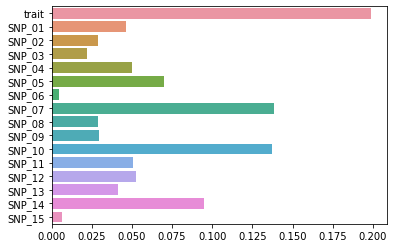

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(train_x1.columns , rand_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=rand_clf.feature_importances_, y=train_x1.columns) #

In [ ]:
#@title 2. XGboost


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=20, gamma = 0, reg_lambda = 1)         # 리더보드 입력 시 정확도 97%로 동일
xgb_model.fit(X_train, y_train)

XGBClassifier(max_depth=20, objective='multi:softprob')

In [ ]:
print(xgb_model.score(X_train, y_train))  # 훈련집합 정확도
print(xgb_model.score(X_test, y_test))    # 검증집합 정확도

1.0
0.96


In [ ]:
y_pred1 = xgb_model.predict(X_test)

In [ ]:
y_prob=xgb.predict_proba(X_test)
y_prob

AttributeError: ignored

In [ ]:
get_clf_eval(y_test, y_pred1)

confusion matrix:
 [[10  0  0]
 [ 0 24  1]
 [ 0  1 14]]

accuracy: 0.9600
precision: 0.9600
recall: 0.9600
F1: 0.9600


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [ ]:
# 최적의 하이퍼 파라미터 탐색

from hyperopt import hp

xgb_search_space = {
    'max_depth':hp.quniform('max_depth', 5, 20, 1),                     
    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),       
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),}

In [ ]:
from sklearn.model_selection import cross_val_score  ## 교차 검증
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):

  xgb_clf = XGBClassifier(
      n_estimators=100,
      max_depth=int(search_space['max_depth']),                
      min_child_weight=int(search_space['min_child_weight']),  
      learning_rate=search_space['learning_rate'], 
      colsample_bytree=search_space['colsample_bytree'],
      eval_metric='logloss'
  )

  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)  ## 3개의 교차 검증 세트로 정확도 반환

  return {
      'loss':(-1) * np.mean(accuracy),
      'status':STATUS_OK
  }

In [ ]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials() ## 결과 저장

best = fmin(
    fn = objective_func,
    space = xgb_search_space,
    algo = tpe.suggest,
    max_evals = 50,    ## 최대 반복 횟수 지정
    trials = trial_val)
best


100%|██████████| 50/50 [00:09<00:00,  5.07it/s, best loss: -0.9440559440559442]


{'colsample_bytree': 0.8335749469685465,
 'learning_rate': 0.0988835603897178,
 'max_depth': 12.0,
 'min_child_weight': 1.0}

In [ ]:
xgb = XGBClassifier(
    learning_rate =0.02,
    n_estimators=100,
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.5,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=CFG.SEED)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=10,
              nthread=-1, objective='multi:softprob', seed=42, subsample=0.8)

In [ ]:
print('훈련세트 정확도: {:.3f}' .format(xgb.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(xgb.score(X_test, y_test)))

훈련세트 정확도: 0.990
테스트세트 정확도: 0.960


In [ ]:
y_pred1 = xgb.predict(X_test)
y_prob=xgb.predict_proba(X_test)

In [ ]:
get_clf_eval(y_test, y_pred1)

ValueError: ignored

Feature importances:
[0.326 0.025 0.024 0.013 0.067 0.06  0.014 0.091 0.025 0.045 0.143 0.03
 0.028 0.022 0.077 0.011]
trait : 0.199
SNP_01 : 0.046
SNP_02 : 0.029
SNP_03 : 0.022
SNP_04 : 0.050
SNP_05 : 0.070
SNP_06 : 0.005
SNP_07 : 0.139
SNP_08 : 0.029
SNP_09 : 0.029
SNP_10 : 0.137
SNP_11 : 0.051
SNP_12 : 0.053
SNP_13 : 0.042
SNP_14 : 0.095
SNP_15 : 0.006


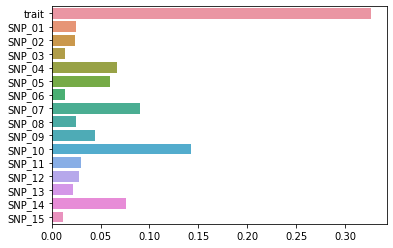

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(xgb.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(train_x1.columns , rand_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=xgb.feature_importances_, y=train_x1.columns) #

In [ ]:
roc_auc_score(y_test, y_prob)

ValueError: ignored

In [ ]:
# ROC & AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
n_classes=3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_prob, multi_class='raise'))

IndexError: ignored

In [ ]:
#@title 3. SVM


In [ ]:
# GridSearch 방법 사용

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=CFG.SEED))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__gamma': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['poly']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

print(gs.best_params_)

0.9542105263157895
{'svc__C': 0.001, 'svc__gamma': 1.0, 'svc__kernel': 'poly'}


In [ ]:
predict = gs.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predict, y_test)

0.96

In [ ]:
svm = SVC(kernel='poly', degree=3, C=0.001, gamma=1.0)      
svm.fit(X_train, y_train)   

SVC(C=0.001, gamma=1.0, kernel='poly')

In [ ]:
print(svm.score(X_train, y_train))  # 훈련집합 정확도
print(svm.score(X_test, y_test))  # 검증집합 정확도

1.0
0.96


In [ ]:
y_pred2 = svm.predict(X_test)
print('예측값 10개만 표시: ', y_pred2[:10])

예측값 10개만 표시:  [1 1 0 1 1 1 1 1 1 1]


In [ ]:
get_clf_eval(y_test, y_pred2)

confusion matrix:
 [[10  0  0]
 [ 0 24  1]
 [ 0  1 14]]

accuracy: 0.9600
precision: 0.9600
recall: 0.9600
F1: 0.9600


In [ ]:
print('훈련세트 정확도: {:.3f}' .format(svm.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(svm.score(X_test, y_test)))

훈련세트 정확도: 0.954
테스트세트 정확도: 0.940


In [ ]:
#@title 4. Catboost


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
cat_features = list(range(0, X_train.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9847715736040609
0.94


In [ ]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.3,
    custom_loss=['AUC', 'Accuracy']
)

catb.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(catb.score(X_train, y_train))  # 훈련집합 정확도
print(catb.score(X_test, y_test))    # 검증집합 정확도

0.9543147208121827
0.96


In [ ]:
print('훈련세트 정확도: {:.3f}' .format(catb.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(catb.score(X_test, y_test)))

훈련세트 정확도: 0.954
테스트세트 정확도: 0.960


In [ ]:
y_pred3 = catb.predict(X_test)

In [ ]:
get_clf_eval(y_test, y_pred3)

confusion matrix:
 [[10  0  0]
 [ 0 24  1]
 [ 0  1 14]]

accuracy: 0.9600
precision: 0.9600
recall: 0.9600
F1: 0.9600


Feature importances:
[49.714  0.     2.779  0.681  5.908 15.781  0.     3.458  4.404  0.053
  7.767  0.     8.097  0.     0.282  1.076]
trait : 49.714
SNP_01 : 0.000
SNP_02 : 2.779
SNP_03 : 0.681
SNP_04 : 5.908
SNP_05 : 15.781
SNP_06 : 0.000
SNP_07 : 3.458
SNP_08 : 4.404
SNP_09 : 0.053
SNP_10 : 7.767
SNP_11 : 0.000
SNP_12 : 8.097
SNP_13 : 0.000
SNP_14 : 0.282
SNP_15 : 1.076


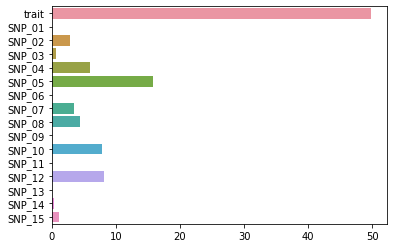

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(catb.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(train_x1.columns , catb.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=catb.feature_importances_, y=train_x1.columns) #

In [ ]:
#@title extra trees


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier   # 사용하는 매개변수가 random forest와 거의 동일

In [ ]:
Ext = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,              # Bootstrap=False가 default값인 것이 rf와 차이점
                     criterion='gini', max_depth=14,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=85,
                     n_jobs=-1, oob_score=False, random_state=CFG.SEED, verbose=0) 
print(Ext)

ExtraTreesClassifier(max_depth=14, n_estimators=85, n_jobs=-1, random_state=42)


In [ ]:
Ext.fit(X_train, y_train)

print(Ext.score(X_train, y_train))   # 훈련집합 정확도
print(Ext.score(X_test, y_test))     # 검증집합 정확도

1.0
0.98


In [ ]:
y_pred4 = Ext.predict(X_test)
get_clf_eval(y_test, y_pred4)

오차행렬:
 [[10  0  0]
 [ 0 25  0]
 [ 0  1 14]]

accuracy: 0.9800
precision: 0.9800
recall: 0.9800
F1: 0.9800


In [ ]:
print('훈련세트 정확도: {:.3f}' .format(Ext.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(Ext.score(X_test, y_test)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.980


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(Ext, X_train, y_train, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.95


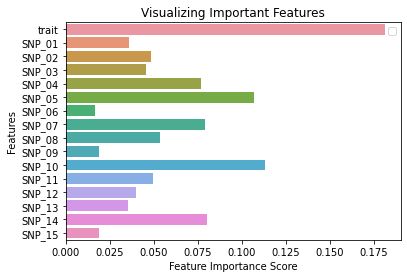

In [ ]:
# 변수 중요도 - random forest보다 각각 특성의 중요도가 전반적으로 상승한다는 특징

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

featureImportance = Ext.feature_importances_
sns.barplot(x=featureImportance, y=train_x.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

In [ ]:
#@title knn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =28)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
# 훈련집합 정확도
print(knn.score(X_test, y_test))
# 검증집합 정확도

0.9289340101522843
0.96


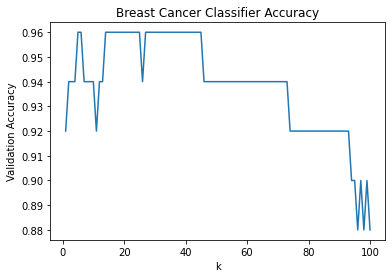

In [ ]:
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

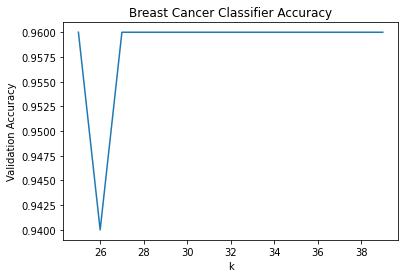

In [ ]:
k_list = range(25,40)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  accuracies.append(knn.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
y_pred5 = knn.predict(X_test)
get_clf_eval(y_test, y_pred5)

오차행렬:
 [[10  0  0]
 [ 0 25  0]
 [ 0  2 13]]

accuracy: 0.9600
precision: 0.9600
recall: 0.9600
F1: 0.9600


In [ ]:
#@title stacking ensemble (최종 모델)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
logist=LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## 하이퍼파라미터 튜닝용 함수
def logistic_tuning(train_sprs, y, params):
    
    model = LogisticRegression(random_state = CFG.SEED)
    # 파라미터 튜닝(train data 전체를 넣어서 5-fold cv)
    grid = GridSearchCV(model, params, scoring = 'roc_auc', cv = 5)
    grid.fit(train_sprs, y)
    
    print(grid.best_params_)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [ ]:
%%time
param1 = {'penalty':['l2', 'l1'],  'C':[0.01, 0.1, 1, 5, 10], 'max_iter': [100,300, 500]}
logistic_tuning(new_data, y_train, params = param1)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
nan
CPU times: user 2.42 s, sys: 28.9 ms, total: 2.45 s
Wall time: 3.24 s


LogisticRegression(C=0.01, random_state=42)

In [ ]:
lg2 = LogisticRegression(C=0.01, max_iter=100, penalty='l2')

In [ ]:
rf_pred = rand_clf.predict(X_train)
xgb_pred = xgb_model.predict(X_train)
svm_pred = svm.predict(X_train)
cat_pred = catb.predict(X_train)

In [ ]:
print("rf : {0:.4f}. xgb : {1:.4f}, svm : {2:.4f}, cat : {3:.4f}".format(accuracy_score(y_train, rf_pred),accuracy_score(y_train, xgb_pred), accuracy_score(y_train, svm_pred), accuracy_score(y_train, cat_pred)))

rf : 0.9645. xgb : 1.0000, svm : 0.9543, cat : 0.9543


In [ ]:
cat_pred = cat_pred.reshape(197, )

In [ ]:
new_data = np.array([rf_pred, xgb_pred, svm_pred, cat_pred])
new_data.shape

(4, 197)

In [ ]:
new_data = np.transpose(new_data)
new_data.shape

(197, 4)

In [ ]:
new_data[:10]

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [0, 0, 0, 0],
       [1, 1, 1, 1]])

In [ ]:
lg2.fit(new_data, y_train)
lg2_pred = lg2.predict(new_data)

In [ ]:
accuracy_score(y_train, lg2_pred)

0.9695431472081218

In [ ]:
y_test.shape

(50,)

In [ ]:
rf_tpred = rand_clf.predict(X_test)
xgb_tpred = xgb_model.predict(X_test)
#lr_pred = lr2.predict(X_tr)
svm_tpred = svm.predict(X_test)
cat_tpred = catb.predict(X_test)

In [ ]:
print("rf : {0:.4f}. xgb : {1:.4f}, svm : {2:.4f}, cat : {3:.4f}".format(accuracy_score(y_test, rf_tpred),accuracy_score(y_test, xgb_tpred), accuracy_score(y_test, svm_tpred), accuracy_score(y_test, cat_tpred)))

rf : 0.9800. xgb : 0.9600, svm : 0.9400, cat : 0.9600


In [ ]:
cat_tpred=cat_tpred.reshape(50, )

In [ ]:
new_test = np.array([rf_tpred, xgb_tpred, svm_tpred, cat_tpred])
new_test.shape

(4, 50)

In [ ]:
new_test = np.transpose(new_test)
new_test.shape

(50, 4)

In [ ]:
new_test[:10]

array([[1, 2, 2, 2],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [ ]:
lg2.fit(new_test, y_test)

LogisticRegression(C=0.05)

In [ ]:
test_pred = lg2.predict(new_test)
accuracy_score(y_test, test_pred)

0.96

In [ ]:
print('훈련세트 정확도: {:.3f}' .format(lg2.score(new_data, y_train)))
print('테스트세트 정확도: {:.3f}' .format(lg2.score(new_test, y_test)))

훈련세트 정확도: 0.970
테스트세트 정확도: 0.960


In [ ]:
y_pred10 = lg2.predict(new_test)
get_clf_eval(y_test, y_pred10)

오차행렬:
 [[10  0  0]
 [ 0 24  1]
 [ 0  1 14]]

accuracy: 0.9600
precision: 0.9600
recall: 0.9600
F1: 0.9600


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lg2, new_data, y_train, cv=3)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.97


shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.1 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
lg2.fit(new_data,y_train)

NameError: ignored

In [ ]:
p_val = lg2.predict(new_test)

In [ ]:
print("RMSE: {}".format(sqrt(mean_squared_error(p_val, y_test))))

RMSE: 0.2


In [ ]:
import numpy as np

In [ ]:
explainer = shap.TreeExplainer(rand_clf, X_train[:100])
shap_values = explainer.shap_values(X_test.values[:50])

# 테스트셋에서 처음 50개의 예에 대한 기여돗값을 얻음

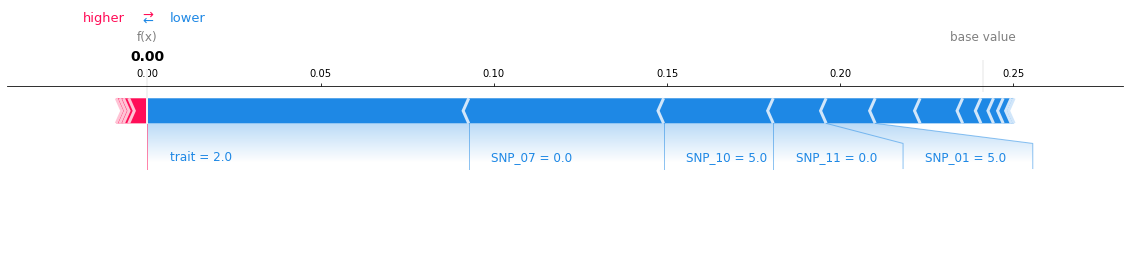

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], matplotlib=True)
# 모델의 예측이 기준선인 -2.5보다 높으면 양의 기여돗값이 표시됨
# 테스트셋의 첫 번째 데이터에 대한 기여돗값

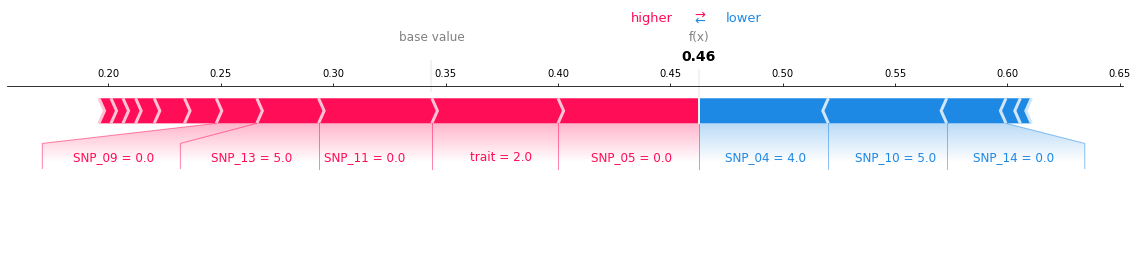

In [ ]:
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X_test.iloc[0,:], matplotlib=True)

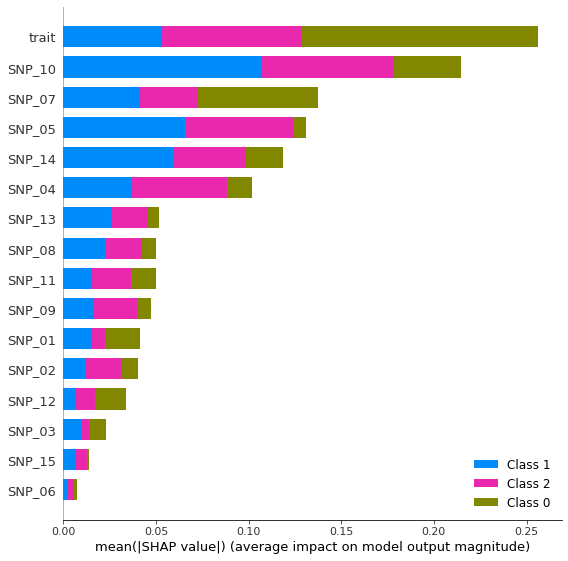

In [ ]:
shap.summary_plot(shap_values, feature_names=X_train.columns.tolist())

In [ ]:
explainer = shap.TreeExplainer(rand_clf)
shap_values = explainer.shap_values(X_train)

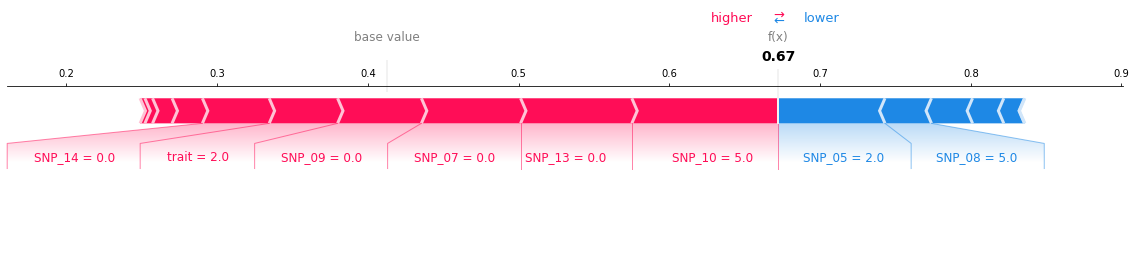

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], train_x.iloc[0,:], matplotlib=True)

In [ ]:
explainer = shap.TreeExplainer(xgb_model, X_train[:100])
shap_values = explainer.shap_values(X_test.values[:50])

# 테스트셋에서 처음 50개의 예에 대한 기여돗값을 얻음

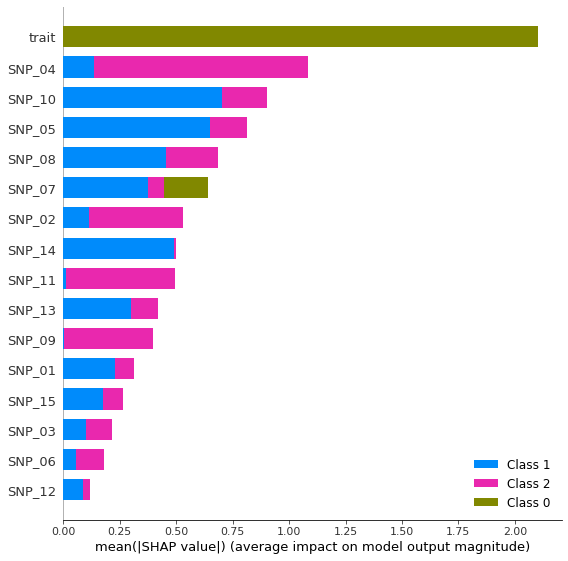

In [ ]:
shap.summary_plot(shap_values, feature_names=X_train.columns.tolist())

In [ ]:
explainer = svm.KernelExplainer(svm.predict)
shap_values = explainer.shap_values(X_test.values[:50])

# 테스트셋에서 처음 50개의 예에 대한 기여돗값을 얻음

AttributeError: ignored

In [ ]:
shap.summary_plot(shap_values, feature_names=X_train.columns.tolist())